# 記述統計
統計解析は、大きく分けて手法は、「記述統計」と「推測統計」に分かれます。

記述統計は、集めたデータの特徴をつかんだり分かりやすく整理したり見やすくしたりする方法です。<br>
つまり、既にあるデータから、そのデータの特徴を抜き出すための手段を言います。<br>
たとえば、平均や標準偏差などを計算してデータの特徴を計算したり、データを分類したり、図やグラフなどを用いて表現したりするのが記述統計です。<br>

## 量的データと質的データ
データは基本的に、量的データと質的データの2つに分けることができます。<br>
集計や分析をする際に、どちらのデータなのかを考えて取り扱う事が大切です。<br>

・**量的データ**：四則演算を適用可能な連続値で表現されるデータであり、比率に意味がある。例）人数や金額などのデータ。

・**質的データ**：四則演算を適用不可能な不連続のデータであり、状態を表現するために利用される。例）順位やカテゴリなどのデータ。

前回の課題で使用した学生のデータでの欠席数などは量的データです。

今回の学習でも、前回使用したデータを使用して学習を進めていきます。

### ヒストグラム
ヒストグラムとは、収集したデータを区間ごとに区切り、その区間ごとのデータ個数を棒グラフで表したものです。<br>
ヒストグラムを作成することで、データの分布状況（バラつき）を視覚的に認識することができます。

前回のデータの中にある欠席数について考えてみることにします。

それぞれの値がいったいどれくらいあるのか観測するのがヒストグラムです。<br>
今回からはグラフを用いていくので、Matplotlibというライブラリを使って、グラフを表示させます

次のセルに以下のコードを入力し実行してください。

import pandas as pd<br>
\# グラフのための図形や軸を作成するインターフェース<br>
import matplotlib.pyplot as plt<br>

master_data = pd.read_excel('data/student-master.xlsx')<br>
\# ヒストグラムを描画するには .histを使用する<br>
plt.hist(master_data['absences'])<br>

\# x軸とy軸のそれぞれのラベルを付ける<br>
plt.xlabel('absences')<br>
plt.ylabel('count')

Text(0, 0.5, 'count')

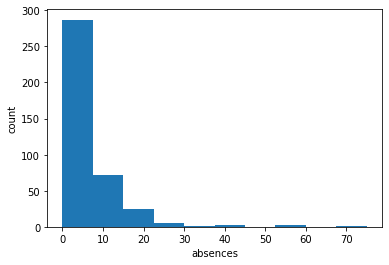

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
master_data = pd.read_excel('data/student-master.xlsx')

plt.hist(master_data["absences"])
plt.xlabel("absences")
plt.ylabel("count")

このヒストグラムをよく見ると、0から10までの付近にデータが集中しているのがわかります。<br>
一方、70以上のデータもあります<br>、
このような分布の裾が緩やかに減少しているような分布をロングテールと呼びます。

### 平均、中央値、最頻値
ヒストグラムは、データの全体像を見る上では理解しやすいものですが、どのような時にデータが偏っているといえるのかなどの情報は読み取れず、客観性が少し乏しくなります。<br>
そのためデータの傾向をもっとよく知りたい場合は、要約統計量と呼ばれる、中央値、平均値、標準偏差値を思います。

平均値は小学校の算数でも出てくるので、あえて説明は不要と思うので説明は省略します。<br>
数学上は以下の様な計算式を用いますが、データサイエンティストを目指す人には計算式を理解する必要がありますが、この講座の対象者では覚える必要はなく、興味があれば数式が理解できるレベルに数学を勉強してみるでよいでしょう。<br>

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

数式を理解するよりも、統計計算をしてくれるライブラリの使い方を覚えましょう。
#### 中央値
中央値は、データの数値を小さい順に並べた時の真ん中の値です。<br>
例えば、３，４，７，９，１０，１２，１５と言うデータがった場合、小さいほうかも大きい方からも真ん中の数字となるのは９です。これが中央値になります<br>
データが奇数個の場合は丁度真ん中の数字がありますが、偶数個の場合は真名に来る数字がありません。<br?
そこで偶数個の場合には、中央に最も近い2つの値の平均値を中央値とします。

#### 最頻値
「最頻値」は、最も頻度が高い値（一番多く出現している値）を指します。
例えば、商品棚には１００円の商品が３個、２００円の商品が１個、３００円の商品が５個あったとします。<br>
そうすると、３００円が最頻値となります。
最頻値は、同じ頻度の物が複数ある場合があります。その場合はその頻度の物がすべて最頻値になります。

平均値には.mean()、中央値には.median()、mode()を使用します。

次のセルに以下の内容を記述し実行してください。

\# 平均値<br>
print('平均値：', master_data['absences'].mean())<br>
\# 中央値<br>
print('中央値：', master_data['absences'].median())<br>
\# 最頻値<br>
print('最頻値：', master_data['absences'].mode())<br>

In [6]:
print("平均値:",master_data["absences"].mean())
print("中央値",master_data["absences"].median())
print("最頻値:",master_data["absences"].mode())

平均値: 5.708860759493671
中央値 4.0
最頻値: 0    0
dtype: int64


### 分散
データの傾向を調べるために、データが散らばっているのか、それともまとまっているのか（平均付近に固まっている）のかを調べると言うのは統計分析でよく使われる方法です。<br>
それが分散です。<br>
分散は、各値の平均との差を2乗したものを平均した値で、分散の計算式は以下の通りです。分散は 𝜎2 と表わされます。（分散の公式は何を基にするかで分散を表現する記述が変わります。V[X] で表わすときは確率変数 X の分散、σ2 で表すときは母集団の分散、s2 で表すときは標本の分散を指すことが多いです。）<br>

\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

分散は.var()で計算できます。値が小さいほど、データの散らばりが少ないことを意味します。<br>
分散の用途の例としては、ある商品が安定して売れているものなのか、安定しては売れていないのかなどの指標になります。<br>
分散が小さければ、ばらつきが少ないので安定している。分散が大きければばらつきが大きいので安定していないと想定出来ます。

次のセルに以下の内容を記述し実行してください。

master_data['absences'].var()


In [7]:
master_data["absences"].var()

64.04954057700957

### 標準偏差
ばらつきを見たい場合、上記の分散を用いるよりも標準偏差を用いることの方が多いかもしれません。<br>
分散では、実際のデータのばらつきがどの程度か解らないからです。<br>
上記で提示した分散の定義式を見るとわかるように、計算式で二乗しているため、実際のデータとは次元が異なっている為です。

標準偏差は実際のデータと同じ次元であるため、ばらつき量を確認することが出来ます。<br>
そのため、ばらつきを評価する時は分散よりも標準偏差の方が扱いやすいと言えます。<br>
標準偏差は分散の平方根で、公式としては以下のようになります。
\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}
標準偏差は.std()で求めることが出来ます。


次のセルに以下の内容を記述し実行してください。


master_data['absences'].std()


In [8]:
master_data["absences"].std()

8.00309568710818

### 要約統計量
要約統計量とは、分布の状態や、特徴を表すために使用する数値のことで、基本統計量とも言います。<br>
得られたデータが少なければ、一つ一つ確認することも可能です、むしろそれがとても重要な場面があります。<br>
しかし、サンプルサイズが大きくなってデータ量も膨大になってしまうと、データを一つ一つ確認することは不司能に近くなってきます。<br>
その際には，データを要約してみる。つまり、要釣統計量を算出してみるという必要性が出てきます。

要約統計量の種類としては、以下の４種類が主な要約統計量として上げられます。
- 代表値・・・分布の中心的な位置を表現する数値。平均値、中央値、最頻値など
- 順序統計量・・・データ（数値）を小さい順に並べたうえで、その結果を利用して算出する統計量。最大値、最小値など
- 散布度・・・分布の広がりを表現する全般的な要約統計量。標準偏差、分散など。この散布度は間隔尺度のデータで使用されることも多く、基準となる原点と単位に関して任意性があるため、標準化される（cf. 標準偏差など）
- モーメント・・・分布の特徴を示す一般的な統計量

#### 代表値
これまでで、平均値、中央値、最頻値値というのを使用してきました。これらは代表値の１種です。
Pandasでは、いくつかの代表値をまとめて求めることが出来ます。

次のセルに以下の内容を記述し実行し記述してください。

master_data['absences'].describe()

In [9]:
master_data["absences"].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

これらの意味は以下の通り。<br>
count: 要素の個数<br>
mean: 平均<br>
std: 標準偏差<br>
min: 最小値<br>
25%, 50%, 75%: 100%を４分割した四分位数のそれぞれのパーセントの所での値（パーセンタイルと呼びます。50%は中央値と同意です。<br>
max: 最大値<br>

今回見たabsencesの情報は量的データです。<br>
質的データであるreasonを見てみます。<br>

次のセルに以下の内容を記述し実行し記述してください。

master_data['reason'].describe()

In [10]:
master_data["reason"].describe()

count        395
unique         4
top       course
freq         145
Name: reason, dtype: object

同じdescribe()を実行しても表示される内容が違います。<br>
これらの意味は以下の通り。<br>
count: 要素の個数<br>
unique: ユニークな値がいくつ存在するか<br>
top: もっとも多く出現した値<br>
freq: topとなった値の出現回数

#### describe()の値をそれぞれ取り出したい場合
describeメソッドの結果は、Seriesオブジェクトになります。<br>
Seriesオブジェクトなので配列の読み出しと同じようにして読み出すことが出来ます。<br>

次のセルに以下の内容を入力し実行してください。

\# 平均を読み出す<br>
print(master_data['absences'].describe()[1])
<br>
\# 最小値を読み出す<br>
print(master_data['absences'].describe()[3])<br>

\# 75% パーセンタイルを読み出す<br>
print(master_data['absences'].describe()[6])<br>

In [11]:
print(master_data["absences"].describe()[1])
print(master_data['absences'].describe()[3])
print(master_data['absences'].describe()[6])

5.708860759493671
0.0
8.0


### 変動係数

これまでに、分散や標準偏差について学習しましたが、異なる種類のデータ同士については単純に比較はできません。<br>
データの大きさがそもそも異なると、大きな値をとるものの方が偏差も大きくなる傾向にあるからです。

そのような場合に使用すると良いのが、変動係数です。<br>
変動係数は、標準偏差を平均値で割った値です。<br>
変動係数を使うとスケールに依存せず、比較できるようになります。<br>
変数は$CV$で示すことが一般的です。
\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}
欠席数の変動係数を求めると次のようになります。<br>

以下のセルに次の内容を記述し実行してください。

master_data['absences'].std() / master_data['absences'].mean()

In [12]:
master_data["absences"].std() / master_data["absences"].mean()

1.4018726369879073

一度に各列の変動係数を調べたい場合は以下の様にすることで調べることが可能です。<br>
それぞれの要素ごとに計算されるのがPandasのDatarFrameやNumpyの特徴です。

次のセルに以下の様に記述し実行してください。

master_data.std() / master_data.mean()

In [13]:
master_data.std() / master_data.mean()

id            0.095301
age           0.076427
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
absences      1.401873
dtype: float64

### 散布図と相関係数
これまでは基本的に1変数のみに着目して、グラフや要約統計量を算出してきました。<br>
次に、変数間の関係性を見ていくために、散布図と相関係数について学習します。

次のセルに以下の内容を記述をし実行してください。

grades_data = pd.read_excel('data/student-grades.xlsx')<br>
plt.plot(grades_data ['G1'], grades_data ['G3'], 'o')<br>

plt.ylabel('G3 grade')<br>
plt.xlabel('G1 grade')<br>
plt.grid(True)<br>


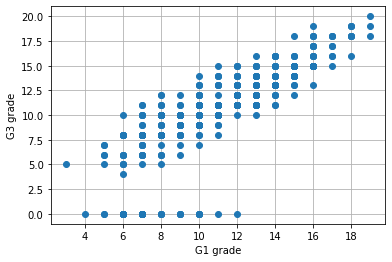

In [14]:
grades_data = pd.read_excel("data/student-grades.xlsx")
plt.plot(grades_data["G1"],grades_data["G3"],"o")
plt.ylabel("G3 grade")
plt.xlabel("G1 grade")
plt.grid(True)

次の散布図は、1期目の成績G1と最終成績G3の関係を示しています。

G１期の成績が良い人ほど後の成績も良いと言う傾向が表れているのがグラフからわかります。

このグラフをよく見てみると、最終成績であるG3期が0である人がいるのがわかります。<br>
G1期の成績で0である人はいなかったので、これが異常値なのか、正しい値なのかはデータを見ているだけでは判断できませんが、データとしてG3の成績のスコアが0から20とあるので正しい値だと判断し、このままで扱うことにします。

分析の現場では、なぜこのような値になっているか原因を突き止めるため、このデータに詳しい人、システム関係の人たちとヒアリングしながら、このデータはどのようにして集められたのか、正しい傾向を表しているデータなのかなど理解しながら進めていく事になります。<br>もし、欠損値等であった場合には、対処方法は色々とありますが、どの様な対処が適切なのかを判断をしながら進めていく事になります。

#### 共分散
次に、2変数の関係性について、数値化してみることを考えます。<br>
2つの変数の関係性を見るための指標として**共分散**があり、その数式は、下記の通りです。共分散が$S_{xy}$で、$x, y$という2つの変数の関係性を示しています。
\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}
共分散は、2組の変数の偏差の積の平均値もなります。<br>
2組以上の変数の分散を考えるときに使われます。<br>
Numpyには共分散の行列（共分散行列）を算出する機能があり、次のように`cov`関数を使うと求められます。<br>
以下ではG1とG3の共分散を計算しています。

以下のセルに次の内容を記述し実行してください。

import numpy as np<br>
np.cov(grades_data['G1'], grades_data['G3'])

In [15]:
import numpy as np
np.cov(grades_data["G1"],grades_data["G3"])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

共分散行列の (1,2) と (2,1) の要素がG1とG3の共分散となります。12.187と言う値<br>
共分散行列の (1,1)はG1の分散<br>
共分散行列の (2,2)はG3の分散<br>

分散は、以前にやった`var`関数で計算できます。実際に計算すると同じ値が得られます。

以下のセルに次の内容を記述し実行してください。

print('G1:',grades_data['G1'].var())<br>
print('G3:',grades_data['G3'].var())

In [16]:
print("G1",grades_data["G1"].var())
print("G1",grades_data["G3"].var())

G1 11.017053267364904
G1 20.989616397866733


#### 相関係数

共分散はその定義式から、各変数のスケールや単位に依存してしまいます。<br>
そのスケールの影響を受けずに、2つの変数の関係を数値化するのが相関係数です。<br>
共分散をそれぞれの変数（ここでは$ x $と$ y $）の標準偏差で割った数式が相関係数です。<br>
その数式は、以下の通りです。相関係数は$r_{xy}$で示すことが一般的です
\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}

この相関係数は、-1から1までの値を取り、1に近ければ近いほど**正の相関**があるといい、-1に近ければ近いほど**負の相関**があるといいます。<br>
概ね<br>
0～0.3未満：ほぼ無関係<br>
0.3～0.5未満：非常に弱い相関<br>
0.5～0.7未満：相関がある<br>
0.7～0.9未満：強い相関<br>
0.9以上：非常に強い相関と言われています。<br>
0に近い場合は、**無相関**であるといいます。<br>

Pythonでは、ピアソン関数が計算できるScipyの`pearsonr`を使って、2変数の相関係数を算出できます。<br>
たとえば、次のようにすると、G1とG3の相関係数を求められます。<br>データ分析の現場で単に相関関数という場合には、ピアソン関数を指します。

次のセルに次の内藤を記述し実行してください。

import scipy as sp<br>
from scipy import stats<br>
sp.stats.pearsonr(grades_data['G1'], grades_data['G3'])

In [17]:
import scipy as sp
from scipy import stats
sp.stats.pearsonr(grades_data['G1'], grades_data['G3'])

ModuleNotFoundError: No module named 'scipy'

結果は、「0.8」と相関関係があるとみなせる高い数字が出ました。<br>

この数字については、厳密に高い低いというのはなく、またこれが高いからといって**因果関係**があるとは言えないので注意しましょう。<br>

また、相関係数はあくまで「直線関係」を示しています。<br>
そのため、二次関数的な関係があったとしても、相関係数は0に近くなります。<br>
そのため、事前に散布図などを作成して目視的に確認しておくことが重要です。<br>

なお、計算結果の2つ目の値はp値という値で、この講座では深くは触れませんが<br>
相関が有意かどうかを判断するには、p値を有意水準と比較します。<br>
p値は、相関係数が0と有意に異なるかどうかを示します。<br>
p値 ≤ α: 相関は統計的に有意です<br>
p値が有意水準以下の場合、相関が0と異なると結論付けることができます。<br>
p値 > α: 相関は統計的に有意ではありません<br>
p値が有意水準より大きい場合、相関が0と異なると結論付けることはできません。<br>

相関係数を持ちる具体的な場合として、あるマーケティング施策で、ある広告を見て効果があったのかなかったのか、因果関係を知りたい場合に、広告を見せた場合のデータと広告を見せない場合のデータに分けて、その比率等を計算していきます。

### 複数項目とのヒストグラムゃ散布図を描く

各項目のヒストグラムをすべて表示したり、散布図を描く方法を紹介します。

このような処理には、統計的データ分析と可視化に関する機能が豊富に用意されているSeabornというライブラリを利用すると便利です。`seaborn`パッケージの`pairplot`を使えば、さまざまな変数の関係性を一度に確認できるので、とても便利です。ただし、変数が多いと計算に時間がかかり、若干見にくくなります。その場合は、これまでの学んだデータ抽出方法で該当データを絞り込むなどするとよいでしょう。

サンプルとして、アルコールの摂取量と成績のスコアに関係があるのか、見てみることにします。

Dalcは平日のアルコール摂取量、Walcは週末のアルコール摂取量です。それらと1期目の成績（G1）、最終成績（G3）の関係を見ています。アルコールを飲むからといって、成績が悪いと言えるのでしょうか。それとも関係ないのでしょうか。

次のセルに次の内容を記述し実行してみてください。

import seaborn as sns<br>
sns.set()<br>

helth_data = pd.read_excel('data/student-health.xlsx')<br>

research_data = pd.merge(helth_data, grades_data, on = 'id')<br>
sns.pairplot(research_data[['Dalc', 'Walc', 'G1', 'G3']])<br>
plt.grid(True)

In [ ]:
import seaborn as sns
sns.set()

helth_data = pd.read_excel('data/student-health.xlsx')

research_data = pd.merge(helth_data, grades_data, on = 'id')
sns.pairplot(research_data[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)


グラフを見ると、平日にお酒を事が多い人はG3の成績が良い人は居ないようです。
そこで、比較のために平均点を見てみます。

次のセルに次の内容を記述し実行してみてください。

research_data.groupby('Walc')['G3'].mean()

グラフでは、何か関係性が有るようにも見えましたが、確かに好成績者はいないものの、平均点を見てみると特別何か飲酒による影響があるとは思えません。

このように、グラフを見ただけで判断は出来ないということです。<br>
データ分析をする際には、根気強く、様々な視点から傾向が無いかを見つけ、裏付けていく事が重要です。